In [2]:
import yfinance as yf
import pandas as pd

In [3]:
# Download Bitcoin price data
df = yf.download(
    "BTC-USD",
    interval="1d",
    period="730d"
)

df.head()

/var/folders/2w/h1bt4559471_khrg5vdk5vtm0000gn/T/ipykernel_62119/3362711806.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-12-25,43613.140625,43765.093750,42765.769531,43010.574219,21115795370
2023-12-26,42520.402344,43603.175781,41676.488281,43599.847656,30026850982
2023-12-27,43442.855469,43683.160156,42167.582031,42518.468750,25260941032
2023-12-28,42627.855469,43804.781250,42318.550781,43468.199219,22992093014
2023-12-29,42099.402344,43124.324219,41424.062500,42614.644531,26000021055


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2023-12-25 to 2025-12-23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   730 non-null    float64
 1   (High, BTC-USD)    730 non-null    float64
 2   (Low, BTC-USD)     730 non-null    float64
 3   (Open, BTC-USD)    730 non-null    float64
 4   (Volume, BTC-USD)  730 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.2 KB


In [5]:
df.isnull().sum()

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

## Visualizing the price

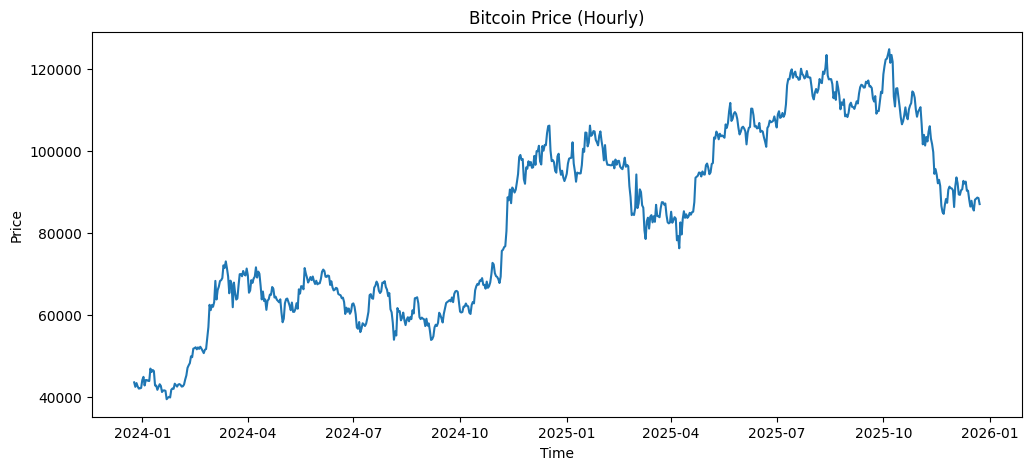

In [6]:
#plot closing price
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"])
plt.title("Bitcoin Price (Hourly)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()



In [7]:
df.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
df.columns = df.columns.get_level_values(0)

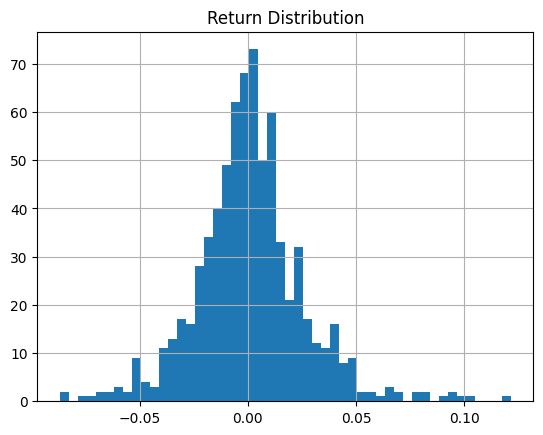

In [9]:
#look at returns(core financial concept)
df["return"] = df["Close"].pct_change()
df["return"].hist(bins=50)
plt.title("Return Distribution")
plt.show()


## Feature Engineering

In [10]:
#price based features
df["return"] = df["Close"].pct_change()
df["hl_range"] = (df["High"] - df["Low"]) / df["Close"]
df["co_change"] = (df["Close"] - df["Open"]) / df["Open"]


In [11]:
#moving averages(SMA-simple moving average)
df["sma_10"] = df["Close"].rolling(10).mean()
df["sma_20"] = df["Close"].rolling(20).mean()
df["sma_50"] = df["Close"].rolling(50).mean()